In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("/content/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
data=data.drop("Serial No.",axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#fuction to create adjusted_R

def adj_r2(x,y):
  r2=regression.score(x,y)
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [6]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

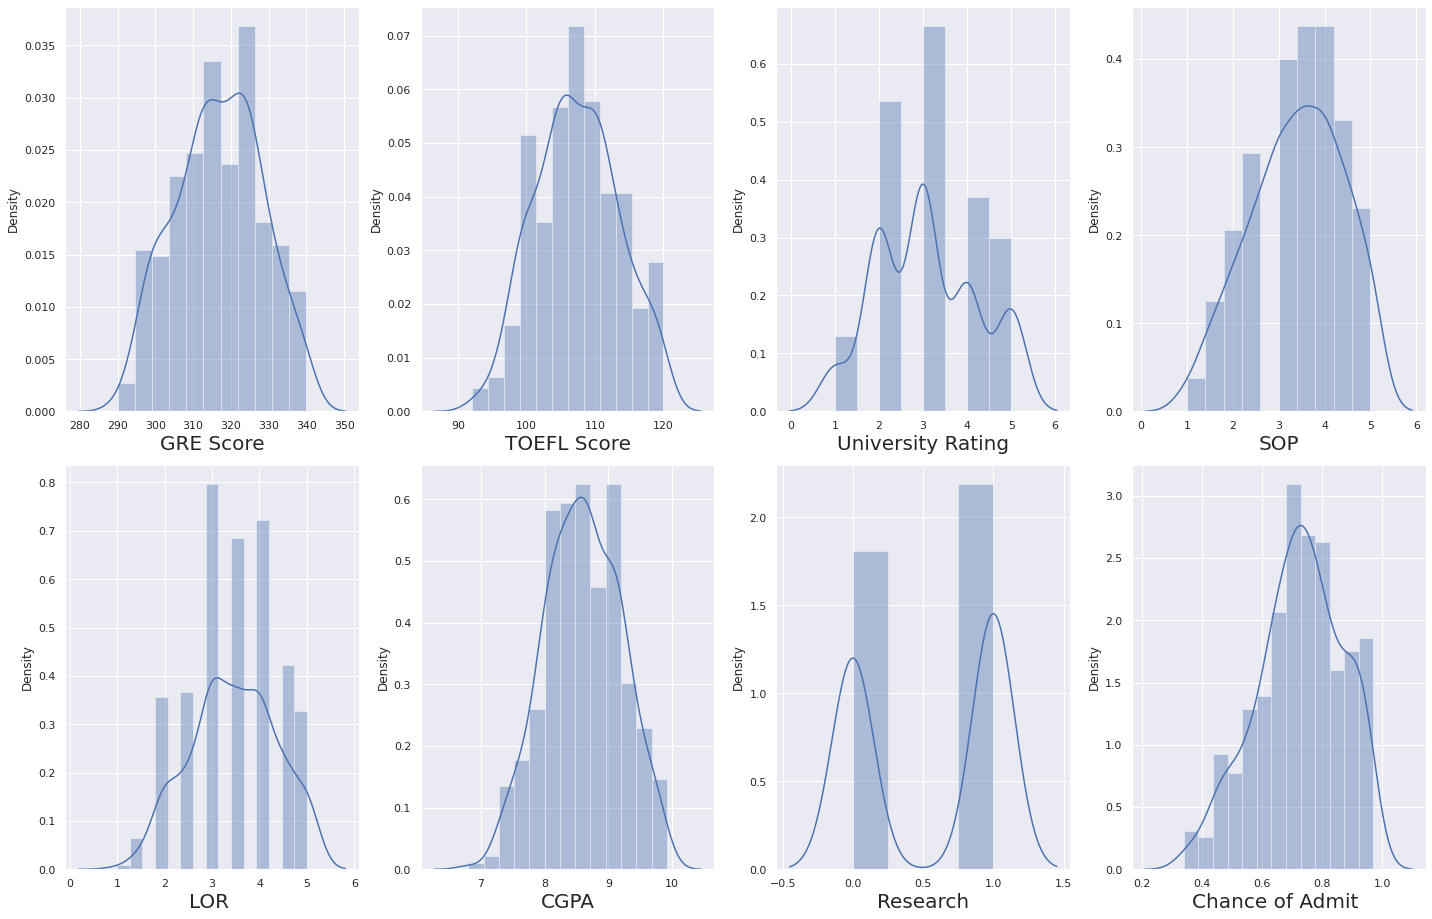

In [7]:
#distribution of every column feature

plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
  if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

In [12]:
x=data.drop(columns=['Chance of Admit '])
y=data['Chance of Admit ']

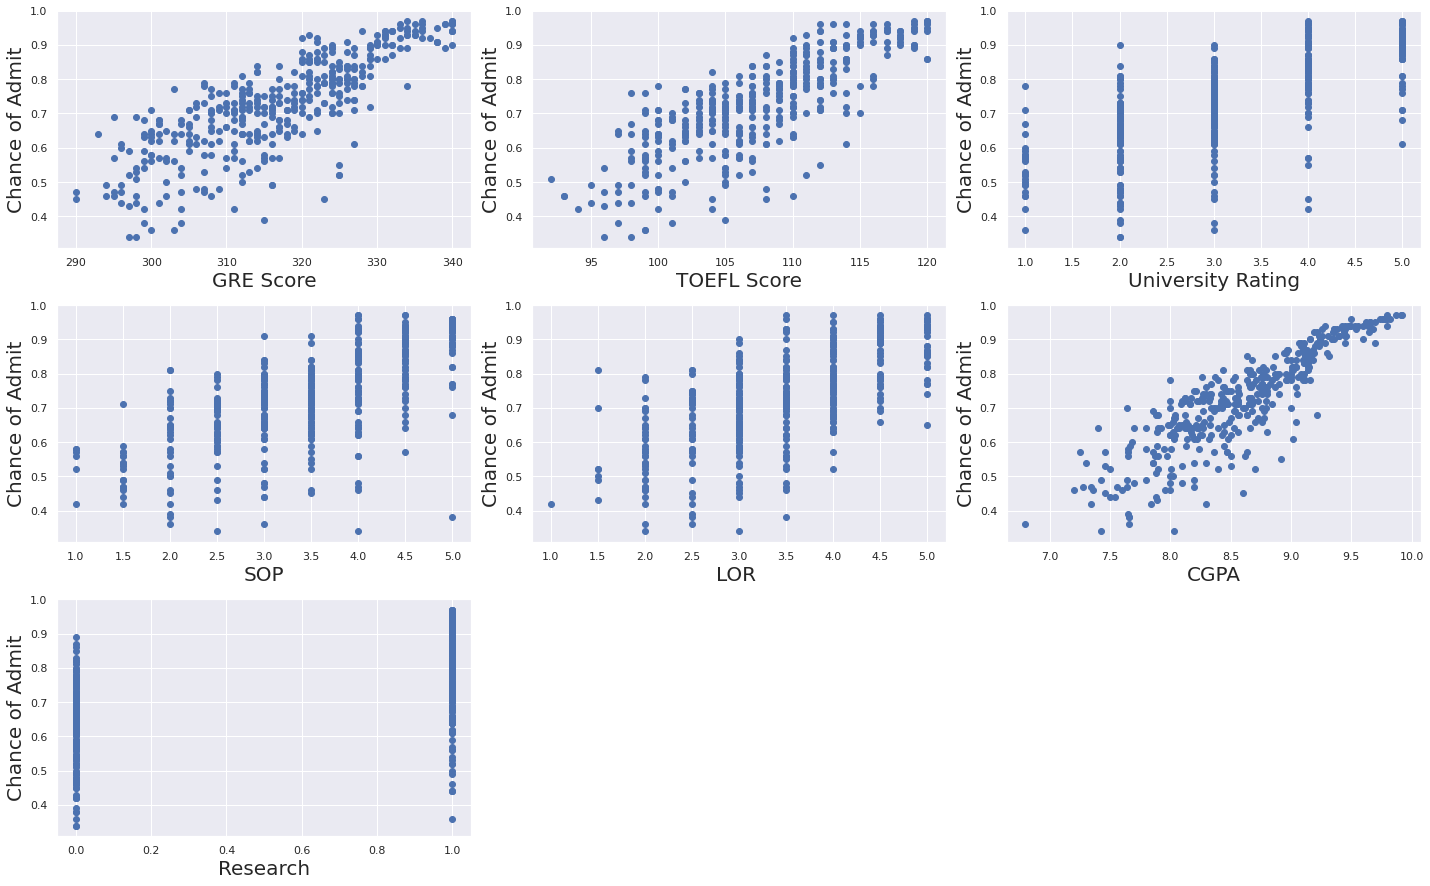

In [13]:
#distribution of x with respect to y

plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for column in x:
  if plotnumber<=15:
    plt.subplot(5,3,plotnumber)
    plt.scatter(x[column],y)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Chance of Admit",fontsize=20)
  plotnumber+=1
plt.tight_layout()

lets move ahead and check for multicollearnity

In [15]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

**Variation inflation factor(VIF)**

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=x_scaled
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"]=x.columns
vif

,VIF,Features
0,4.615516,GRE Score
1,4.288959,TOEFL Score
2,2.919606,University Rating
3,3.075504,SOP
4,2.431258,LOR
5,5.207403,CGPA
6,1.543312,Research


As a thumb rule VIF greater than 5  means severe multicollinearity


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [21]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#save the model 
import pickle

In [30]:
filename="/.pickle"
pickle.dump(regression,open(filename,"wb"))

In [35]:
#prediction using save model
load_model=pickle.load(open(filename,"rb"))
a=load_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

array([0.89957137])

In [39]:
regression.score(x_train,y_train)

0.8284056016355628

In [36]:
adj_r2(x_train,y_train)

0.8242920372912098

In [37]:
regression.score(x_test,y_test)

0.7204585720546246

In [38]:
adj_r2(x_test,y_test)

0.6991891155805199

so our adjusated_r2 is less in test data.so lets see our model is overfitting training data

**Lasso/l1 regression**

In [41]:
#lassocv returns best alpha and coefficients after performing 10cv
lasso=LassoCV(alphas=None,max_iter=1000,cv=10,normalize=True)
lasso.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [42]:
#best alpha parameter
alpha=lasso.alpha_
alpha

4.133387392223961e-05

In [46]:
#now we get best alpha now use lasso to see how our data is fitted

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=4.133387392223961e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
lasso_reg.score(x_test,y_test)

0.7204493834913801

this is not overfitting as score before and after is same.

**Ridge/l2 regression**

In [51]:
alpha=np.random.uniform(low=0,high=10,size=(50,))
ridge=RidgeCV(alphas=alpha,cv=10,normalize=True)
ridge.fit(x_train,y_train)

RidgeCV(alphas=array([5.16626529, 4.9185244 , 6.15599607, 1.15688583, 4.51137521,
       6.48262913, 0.53837038, 5.95546953, 1.79561593, 1.26153009,
       9.27953584, 5.83079312, 4.32043851, 7.36451105, 5.41191017,
       5.90211046, 4.03333965, 7.77735578, 8.29518466, 5.1957189 ,
       2.1485683 , 5.04375423, 2.52762481, 1.76483772, 9.1905473 ,
       0.15827125, 8.99426375, 1.24981905, 9.90878326, 5.74131614,
       1.91373943, 0.45763699, 1.09746997, 4.22321672, 6.8151979 ,
       1.49035637, 2.96538545, 6.525621  , 3.38709512, 0.52796071,
       3.42465448, 5.66556481, 2.1915503 , 6.4434349 , 7.46152829,
       2.86857052, 3.58436192, 3.6721118 , 1.1708944 , 8.01306378]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [52]:
alpha=ridge.alpha_
alpha

0.1582712542745779

In [54]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1582712542745779, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
ridge_reg.score(x_test,y_test)

0.7203961021794364

not overfitter as have same score before and after reguralization

**ElasticNet**

In [57]:
elasticnet=ElasticNetCV(alphas=None,cv=10)
elasticnet.fit(x_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [58]:
alpha=elasticnet.alpha_
alpha

0.0013356171165894832

In [59]:
#l1_ration gives the value how much model is close to l1 regularzation
l1_ratio=elasticnet.l1_ratio
l1_ratio

0.5

In [62]:
elasticnet_reg=ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
elasticnet_reg.fit(x_train,y_train)

ElasticNet(alpha=0.0013356171165894832, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [63]:
elasticnet_reg.score(x_test,y_test)

0.7201805215503329

not an overfitted model